In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join
from astropy.wcs import WCS

In [2]:
# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 5

In [3]:
# Reduced data in txt files
red_dat_path = "A:/Documents/Grad_School/Research/igrins_reduced_text/"
fig_path = "A:/Documents/Grad_School/Research/"
# Glob the H band txt files
k_spec_files = glob.glob(red_dat_path+"*_K_*.txt")

In [4]:
# Preliminary look at hd286178, an M5 spectral type in Taurus, total int time of 300
hd286178_files = glob.glob(red_dat_path+"*hd286178*_k_*")
hd286178_files

['A:/Documents/Grad_School/Research/igrins_reduced_text\\HD286178_20190120_K_0049_spec_A0v.txt']

In [5]:
# Use pandas to read the .txt file and create a data frame
# Skip first few lines of header, change "-NaN" to NaN in the signal-to-noise columns
hd286178_df = pd.read_csv(hd286178_files[0],skiprows=7, delim_whitespace=True,na_values=['-NaN'])
# Make column names
hd286178_df.columns = ["Spectral Index", "Wavelength", "Flux", "SNR"]
# Define thresholds for SNR and Flux
snr_threshold = 5
flux_threshold = 0
# Do the selection using pandas dataframe magic
hd286178_df = hd286178_df[(hd286178_df["SNR"] > snr_threshold) & (hd286178_df["Flux"] > flux_threshold)]
hd286178_df

,Spectral Index,Wavelength,Flux,SNR
1177,0.0,1.88202,1013460.0,5.23578
1188,0.0,1.88216,1788810.0,5.11376
1192,0.0,1.88221,844547.0,5.34435
1195,0.0,1.88225,695121.0,5.75389
1197,0.0,1.88227,783104.0,5.57669
...,...,...,...,...
50365,24.0,2.50587,2314060.0,5.13012
50506,24.0,2.50813,43856000.0,6.27712
50524,24.0,2.50842,1040650.0,5.48382
50531,24.0,2.50853,669253.0,6.79537


In [6]:
# Wavelength (microns)
hd286178_wavlen = hd286178_df['Wavelength']
# Flux (counts)
hd286178_flux = hd286178_df['Flux']

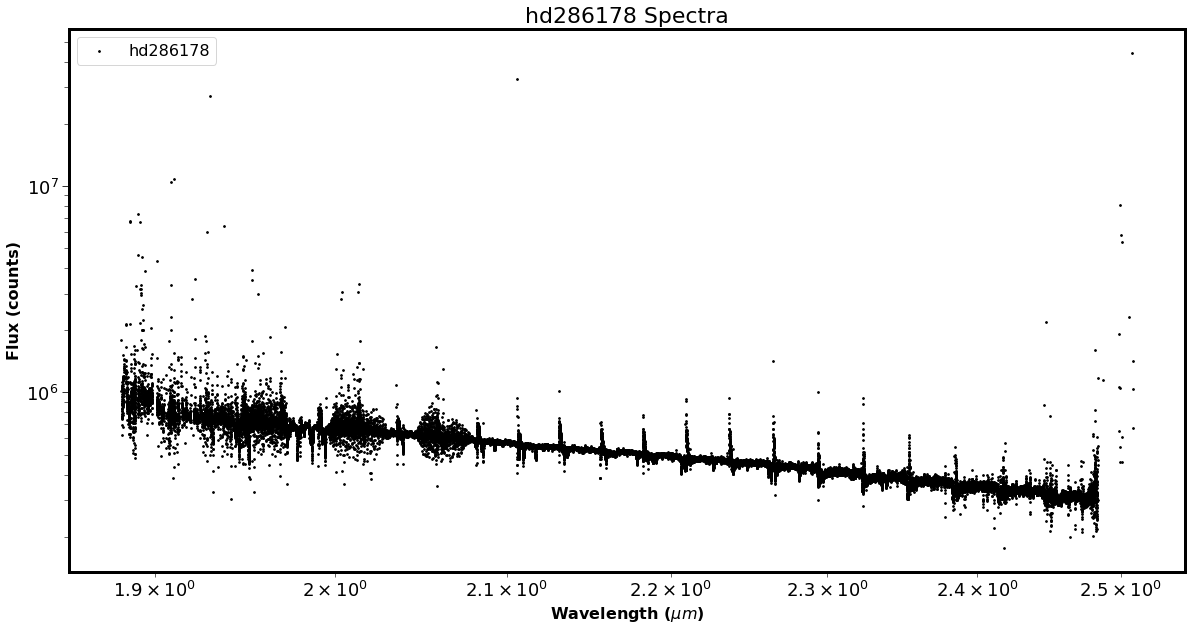

In [7]:
# for wavlen,flux in zip(hd286178_wavlen,hd286178_flux):

fig,ax = plt.subplots(figsize=(20,10))

# Plot wavelength vs flux
# there is definitely a way to do this with a for loop but oh well
ax.scatter(hd286178_wavlen, hd286178_flux,label="hd286178",s=3,c="black")

# ax.set_xlim(1.55,1.56)
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='best')

ax.set_title("hd286178 Spectra", fontsize = 22)
ax.set_xlabel('Wavelength ($\mu m$)',fontsize=16)
ax.set_ylabel('Flux (counts)',fontsize=16)

plt.savefig(fig_path + "hd286178_igrins_spectra" + '.png',facecolor='white')
plt.show()